<a href="https://www.kaggle.com/code/mahmoudlinux/international-sales-by-mlinux?scriptVersionId=197986661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Load Required Library**

In [1]:
import pandas as pd
import numpy as py
import matplotlib as mpl
import sqlite3 as sql

# **Python**

# **Load data set**

In [2]:
pathcsv = r"/kaggle/input/international-sales/International-Sales.csv"
dataset = pd.read_csv(pathcsv)

# **Show sample of dataset**

In [3]:
dataset.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,2000,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,1111,418
5,5/15/2016,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,5/22/2014,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,5/22/2016,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2/22/2014,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2/22/2016,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [4]:
dataset.tail(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113026,7/8/2013,8,July,2013,29,Young Adults (25-34),M,Germany,Hessen,Clothing,Vests,"Classic Vest, L",20,24,64,710,480,1190
113027,7/8/2015,8,July,2015,29,Young Adults (25-34),M,Germany,Hessen,Clothing,Vests,"Classic Vest, L",21,24,64,746,504,1250
113028,12/28/2013,28,December,2013,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113029,12/28/2015,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113030,4/12/2014,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369
113031,4/12/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,4/2/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,4/2/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,3/4/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,3/4/2016,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


# **Show general information about dataset**

In [5]:
dataset.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.336663,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.878543,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [6]:
dataset.info(verbose=True,memory_usage=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

# **Fix Date as datetime column**

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

# **Get All column headers**

In [8]:
columns = dataset.columns.values.tolist()

columns

['Date',
 'Day',
 'Month',
 'Year',
 'Customer_Age',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

# **Get Columns in their different type (numbers and catagory)**

In [9]:
allcolumn = pd.DataFrame(data= dataset.dtypes).reset_index()[[0,"index"]]

numcol = allcolumn[(allcolumn[0] != "object")].iloc[:,1:]
catagorycol = allcolumn[(allcolumn[0] == "object")].iloc[:,1:]

 
catagorycol

,index
2,Month
5,Age_Group
6,Customer_Gender
7,Country
8,State
9,Product_Category
10,Sub_Category
11,Product


In [10]:
numcol

,index
0,Date
1,Day
3,Year
4,Customer_Age
12,Order_Quantity
13,Unit_Cost
14,Unit_Price
15,Profit
16,Cost
17,Revenue


# **Check missing data/value**

In [11]:
dataset.isna().sum(numeric_only=False,skipna=False)

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# **Is there duplicate?**

In [12]:
dataset.duplicated(keep=False).sum()

1993

In [13]:
dataset[(dataset.duplicated(keep=False) == True)]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1020,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1090,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1092,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111952,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111954,2015-09-20,20,September,2015,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


# **Drop Duplicate Data**

In [14]:
dataset.drop_duplicates(keep=False,inplace=True)

In [15]:
#check duplicate again
dataset.duplicated(keep=False).sum()

0

# **Average Profit in year 2013**

In [16]:
dataset[(dataset["Year"] == 2013)]["Profit"].mean()

244.33444412046487

# **Average Profit per year / show it in Graph**

In [17]:
year_profit = dataset.groupby(["Year"])["Profit"].mean()

year_profit

Year
2011    1078.074672
2012    1103.175339
2013     244.334444
2014     200.124831
2015     310.922584
2016     241.469316
Name: Profit, dtype: float64

<Axes: xlabel='Year'>

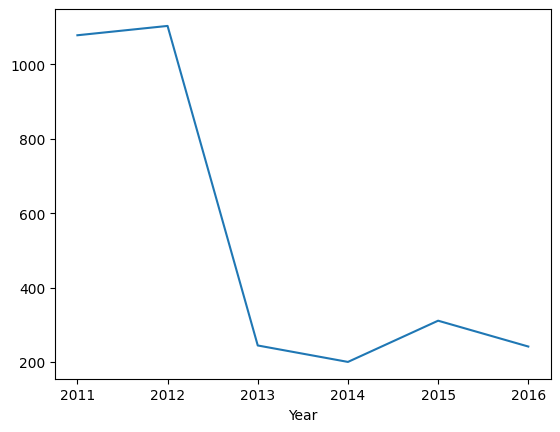

In [18]:
year_profit.plot(kind="line")

# **Get Products Name that have High profit and revenue with low cost**

In [19]:
dataset[(dataset["Profit"] > dataset["Profit"].mean()) &
 (dataset["Revenue"] > dataset["Revenue"].mean()) & 
       (dataset["Cost"] < dataset["Cost"].mean())][["Product","Profit","Revenue","Cost","Country"]]

,Product,Profit,Revenue,Cost,Country
0,Hitch Rack - 4-Bike,590,950,360,Canada
1,Hitch Rack - 4-Bike,590,950,360,Canada
15,Hitch Rack - 4-Bike,517,832,315,Canada
21,Hitch Rack - 4-Bike,590,950,360,Canada
22,Hitch Rack - 4-Bike,524,929,405,United States
...,...,...,...,...,...
113003,"Classic Vest, M",562,922,360,United Kingdom
113016,"Classic Vest, L",497,881,384,United States
113017,"Classic Vest, L",559,991,432,United States
113024,"Classic Vest, S",620,1004,384,United States


# **SQL**

# **Load data set**

In [20]:
pathdb = r"/kaggle/input/internation-salesdb/International-Sales.db"

conn = sql.connect(pathdb)


def sqlcmd(command, fetchtype='one'):
    
    cur = conn.cursor()
    
    data = cur.execute(command)
    if fetchtype == 'one': return data.fetchone()
    else: return data.fetchall()
    
    cur.close()

# **Show sample of dataset**

In [21]:
sqlcmd(command='select * from Sales Limit 10;',fetchtype='all')   
    


[('11/26/2013',
  26,
  'November',
  2013,
  19,
  'Youth (<25)',
  'M',
  'Canada',
  'British Columbia',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  8,
  45,
  120,
  590,
  360,
  950),
 ('11/26/2015',
  26,
  'November',
  2015,
  19,
  'Youth (<25)',
  'M',
  'Canada',
  'British Columbia',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  8,
  45,
  120,
  590,
  360,
  950),
 ('3/23/2014',
  23,
  'March',
  2014,
  49,
  'Adults (35-64)',
  'M',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  23,
  45,
  120,
  1366,
  1035,
  2401),
 ('3/23/2016',
  23,
  'March',
  2016,
  49,
  'Adults (35-64)',
  'M',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  20,
  45,
  120,
  1188,
  2000,
  2088),
 ('5/15/2014',
  15,
  'May',
  2014,
  47,
  'Adults (35-64)',
  'F',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
 

In [22]:
sqlcmd(command='select * from Sales Limit 10 ;',fetchtype='all')   

[('11/26/2013',
  26,
  'November',
  2013,
  19,
  'Youth (<25)',
  'M',
  'Canada',
  'British Columbia',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  8,
  45,
  120,
  590,
  360,
  950),
 ('11/26/2015',
  26,
  'November',
  2015,
  19,
  'Youth (<25)',
  'M',
  'Canada',
  'British Columbia',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  8,
  45,
  120,
  590,
  360,
  950),
 ('3/23/2014',
  23,
  'March',
  2014,
  49,
  'Adults (35-64)',
  'M',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  23,
  45,
  120,
  1366,
  1035,
  2401),
 ('3/23/2016',
  23,
  'March',
  2016,
  49,
  'Adults (35-64)',
  'M',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
  20,
  45,
  120,
  1188,
  2000,
  2088),
 ('5/15/2014',
  15,
  'May',
  2014,
  47,
  'Adults (35-64)',
  'F',
  'Australia',
  'New South Wales',
  'Accessories',
  'Bike Racks',
  'Hitch Rack - 4-Bike',
 

# **Get columns name headers**

In [23]:
numofcol= len(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all'))

colname =[]

for i in range(numofcol):
    colname.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][1])
    
print(colname)    

['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


# **Get Columns in their different type (numbers and catagory)**

In [24]:
catogarycolname = []
numbercolname = []
allcol = []

for i in range(numofcol):
    if sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][2] == 'INTEGER':
        numbercolname.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][1])
        allcol.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][1])
        
    elif sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][2] == 'TEXT':
        catogarycolname.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][1])
        allcol.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all')[i][1])
    else: pass
        
    
    
print("Catogary:- ",catogarycolname)
print("Number:- ",numbercolname)
print("All :- ",allcol)

Catogary:-  ['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
Number:-  ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
All :-  ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


# **Show general information about dataset**

In [25]:
print("# of rows:- ",sqlcmd(command='select count(*) from Sales ;',fetchtype='one')[0])
print("# of columns:- ",numofcol,"\n")

for everycol in numbercolname:
    print(f"Average {everycol}:- ",sqlcmd(command=f'select AVG({everycol}) from Sales ;',fetchtype='one')[0])
    print(f"Lowest {everycol}:- ",sqlcmd(command=f'select MIN({everycol}) from Sales ;',fetchtype='one')[0])
    print(f"Highest {everycol}:- ",sqlcmd(command=f'select MAX({everycol}) from Sales ;',fetchtype='one')[0])
    print(f"Total {everycol}:- ",sqlcmd(command=f'select SUM({everycol}) from Sales ;',fetchtype='one')[0])
    print("\n")
    

# of rows:-  113036
# of columns:-  18 

Average Day:-  15.665752503627163
Lowest Day:-  1
Highest Day:-  31
Total Day:-  1770794


Average Year:-  2014.4017392689054
Lowest Year:-  2011
Highest Year:-  2016
Total Year:-  227699915


Average Customer_Age:-  35.91921157861212
Lowest Customer_Age:-  17
Highest Customer_Age:-  87
Total Customer_Age:-  4060164


Average Order_Quantity:-  11.901659648253654
Lowest Order_Quantity:-  1
Highest Order_Quantity:-  32
Total Order_Quantity:-  1345316


Average Unit_Cost:-  267.296365759581
Lowest Unit_Cost:-  1
Highest Unit_Cost:-  2171
Total Unit_Cost:-  30214112


Average Unit_Price:-  452.9384266959199
Lowest Unit_Price:-  2
Highest Unit_Price:-  3578
Total Unit_Price:-  51198348


Average Profit:-  285.0516649562971
Lowest Profit:-  -30
Highest Profit:-  15096
Total Profit:-  32221100


Average Cost:-  469.33666265614494
Lowest Cost:-  1
Highest Cost:-  42978
Total Cost:-  53051939


Average Revenue:-  754.3703598853463
Lowest Revenue:-  2
Hig

In [26]:
dataheader = [("index","Data Type","Allow Null","PK","-")]

dataheader.append(sqlcmd(command=f"PRAGMA table_info(Sales)",fetchtype='all'))


dataheader


[('index', 'Data Type', 'Allow Null', 'PK', '-'),
 [(0, 'Date', 'TEXT', 0, None, 0),
  (1, 'Day', 'INTEGER', 0, None, 0),
  (2, 'Month', 'TEXT', 0, None, 0),
  (3, 'Year', 'INTEGER', 0, None, 0),
  (4, 'Customer_Age', 'INTEGER', 0, None, 0),
  (5, 'Age_Group', 'TEXT', 0, None, 0),
  (6, 'Customer_Gender', 'TEXT', 0, None, 0),
  (7, 'Country', 'TEXT', 0, None, 0),
  (8, 'State', 'TEXT', 0, None, 0),
  (9, 'Product_Category', 'TEXT', 0, None, 0),
  (10, 'Sub_Category', 'TEXT', 0, None, 0),
  (11, 'Product', 'TEXT', 0, None, 0),
  (12, 'Order_Quantity', 'INTEGER', 0, None, 0),
  (13, 'Unit_Cost', 'INTEGER', 0, None, 0),
  (14, 'Unit_Price', 'INTEGER', 0, None, 0),
  (15, 'Profit', 'INTEGER', 0, None, 0),
  (16, 'Cost', 'INTEGER', 0, None, 0),
  (17, 'Revenue', 'INTEGER', 0, None, 0)]]

# **Check missing data/value**

In [27]:
for i in range(numofcol):
    print(allcol[i],sqlcmd(command=f'select count({allcol[i]}) from Sales where {allcol[i]} is null',fetchtype='all')[0][0])

Date 0
Day 0
Month 0
Year 0
Customer_Age 0
Age_Group 0
Customer_Gender 0
Country 0
State 0
Product_Category 0
Sub_Category 0
Product 0
Order_Quantity 0
Unit_Cost 0
Unit_Price 0
Profit 0
Cost 0
Revenue 0
